In [1]:
import warnings
warnings.filterwarnings('ignore')


In [55]:
import numpy as np
import pandas as pd
movies=pd.read_csv("Movie+Assignment+Data.csv")


In [56]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
movies.isnull().sum(axis=0)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [57]:
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [58]:
round(100*(movies.isnull().sum(axis=0))/len(movies.index),2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [59]:
m1=movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1)
m1.head()
#Creating variable m1 post dropping of unnecessary columns. Analysis will done on df m1 from  now on

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,7.1,0


In [60]:
round(100*(m1.isnull().sum(axis=0))/len(m1.index),2)

director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [61]:
m1=m1[~m1.gross.isnull()]
m1=m1[~movies.budget.isnull()]
m1.shape

(3891, 13)

In [62]:
m1['language'].fillna(value='English',inplace=True)
round(100*(m1.isnull().sum()/len(m1.index)),2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [63]:
round(100*(len(m1.index)/len(movies.index)),2)

77.16

In [64]:
m1.gross=m1.gross.div(1000000)
m1.budget=m1.budget.div(1000000)


In [65]:
m1['Profit']=m1['gross']-m1['budget']


In [66]:
m1.sort_values(by='Profit',ascending=False)
m1.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000,-190.641321


In [67]:
top10=m1.sort_values(by='Profit',ascending=False).head(10)

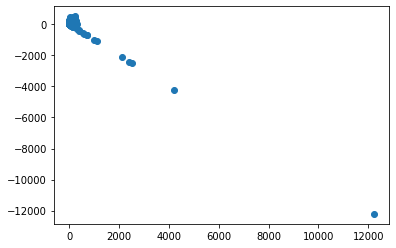

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(m1.budget,m1.Profit)
plt.show()
#m2=m1[(m1.Profit>=-2000)& (m1.budget<2000)] gives high budget low profit type of outliers
#m3=m1[(m1.Profit>=500)& (m1.budget<500)]  gives low budget high profit type of outliers
#we can scatterplot the above conditions to make an analysis & to decide on how to proceed with outliers

In [69]:
m1.drop_duplicates(inplace=True)
top10=m1.sort_values(by='Profit',ascending=False).head(10)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


In [70]:
IMDb_Top_250=m1.sort_values(by='imdb_score', ascending=False)
IMDb_Top_250=IMDb_Top_250[IMDb_Top_250.num_voted_users>25000]
IMDb_Top_250=IMDb_Top_250.head(250)
Rank=[ x for x in range(1,251)]
IMDb_Top_250['Rank'] =Rank
IMDb_Top_250.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Rank
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.341469,1
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.821952,2
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.300000,3
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061,4
339,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,283.019252,5


In [71]:
Top_Foreign_Lang_Film =IMDb_Top_250.loc[(IMDb_Top_250.language!='English'),:]
Top_Foreign_Lang_Film 

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Rank
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.200000,1966.0,8.9,20000,4.900000,8
4747,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.000000,1954.0,8.7,11000,-1.730939,15
4029,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.300000,2002.0,8.7,28000,4.263397,16
2373,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.000000,2001.0,8.6,28000,-8.950114,28
4259,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.000000,2006.0,8.5,39000,9.284657,34
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.180000,1997.0,8.5,0,0.745402,46
1298,Jean-Pierre Jeunet,242.0,33.201661,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,1314.0,French,77.000000,2001.0,8.4,39000,-43.798339,48
4105,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.000000,2003.0,8.4,43000,-0.818710,50
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809,51
1329,S.S. Rajamouli,44.0,6.498000,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410.0,Telugu,18.026148,2015.0,8.4,21000,-11.528148,52


In [72]:
top10director=m1.groupby('director_name')['imdb_score'].mean().reset_index().sort_values(by=['imdb_score','director_name'],ascending=[False,True]).head(10)
top10director

,director_name,imdb_score
216,Charles Chaplin,8.600000
1675,Tony Kaye,8.600000
45,Alfred Hitchcock,8.500000
302,Damien Chazelle,8.500000
1017,Majid Majidi,8.500000
1440,Ron Fricke,8.500000
1498,Sergio Leone,8.433333
260,Christopher Nolan,8.425000
103,Asghar Farhadi,8.400000
1035,Marius A. Markevicius,8.400000


In [73]:
new=m1.genres.apply(str).str.split('|')

m1['genre_1']=new.apply(lambda x : x[0])
m1['genre_2']=new.apply(lambda x : x[1] if len(x)>1 else x[0] )

m1.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0,9.404152,Action,Adventure
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000,-44.925825,Action,Adventure
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000,198.130642,Action,Thriller
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000,-190.641321,Action,Adventure


In [74]:
movies_by_segment=m1.groupby(['genre_1','genre_2'])

In [75]:
PopGenre=movies_by_segment.gross.mean().sort_values(ascending=False).reset_index().head(5)
PopGenre

,genre_1,genre_2,gross
0,Family,Sci-Fi,434.949459
1,Adventure,Sci-Fi,228.627758
2,Adventure,Family,118.919540
3,Adventure,Animation,116.998550
4,Action,Adventure,109.595465


In [76]:
Meryl_Streep=m1.loc[m1.actor_1_name=='Meryl Streep']
Meryl_Streep.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
410,Nancy Meyers,187.0,112.703470,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.703470,Comedy,Drama
1106,Curtis Hanson,42.0,46.815748,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,1.815748,Action,Adventure
1204,Nora Ephron,252.0,94.125426,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.125426,Biography,Drama
1408,David Frankel,208.0,124.732962,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.732962,Comedy,Drama
1483,Robert Redford,227.0,14.998070,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,298.0,English,35.0,2007.0,6.2,0,-20.001930,Drama,Thriller


In [77]:
Leo_Caprio =m1.loc[m1.actor_1_name=='Leonardo DiCaprio']
Leo_Caprio.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302,Drama,Romance
50,Baz Luhrmann,490.0,144.812796,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362912,753.0,English,105.0,2013.0,7.3,115000,39.812796,Drama,Romance
97,Christopher Nolan,642.0,292.568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,132.568851,Action,Adventure
179,Alejandro G. Iñárritu,556.0,183.635922,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,1188.0,English,135.0,2015.0,8.1,190000,48.635922,Adventure,Drama
257,Martin Scorsese,267.0,102.608827,Biography|Drama,Leonardo DiCaprio,The Aviator,264318,799.0,English,110.0,2004.0,7.5,0,-7.391173,Biography,Drama


In [78]:
Brad_Pitt =m1.loc[m1.actor_1_name=='Brad Pitt']
Brad_Pitt.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
101,David Fincher,362.0,127.490802,Drama|Fantasy|Romance,Brad Pitt,The Curious Case of Benjamin Button,459346,822.0,English,150.0,2008.0,7.8,23000,-22.509198,Drama,Fantasy
147,Wolfgang Petersen,220.0,133.228348,Adventure,Brad Pitt,Troy,381672,1694.0,English,175.0,2004.0,7.2,0,-41.771652,Adventure,Adventure
254,Steven Soderbergh,198.0,125.531634,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627.0,English,110.0,2004.0,6.4,0,15.531634,Crime,Thriller
255,Doug Liman,233.0,186.336103,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798.0,English,120.0,2005.0,6.5,0,66.336103,Action,Comedy
382,Tony Scott,142.0,0.026871,Action|Crime|Thriller,Brad Pitt,Spy Game,121259,361.0,English,92.0,2001.0,7.0,0,-91.973129,Action,Crime


In [79]:
Combined=pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt])
Combined.shape

(49, 16)

In [80]:
Combined.groupby('actor_1_name')['num_critic_for_reviews', 'num_user_for_reviews'].mean().sort_values(['num_critic_for_reviews', 'num_user_for_reviews'],ascending = False)

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Leonardo DiCaprio,330.190476,914.476190
Brad Pitt,245.000000,742.352941
Meryl Streep,181.454545,297.181818


In [81]:
m1['decade']=m1['title_year']//10*10
m1.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2,decade
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure,2000.0
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0,9.404152,Action,Adventure,2000.0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000,-44.925825,Action,Adventure,2010.0
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000,198.130642,Action,Thriller,2010.0
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000,-190.641321,Action,Adventure,2010.0


In [82]:
m1.sort_values(by='decade',inplace=True,ascending=True)
df_by_decade=m1.groupby('decade').num_voted_users.sum().reset_index()

df_by_decade


,decade,num_voted_users
0,1920.0,116392
1,1930.0,804839
2,1940.0,230838
3,1950.0,678336
4,1960.0,2983442
5,1970.0,8524102
6,1980.0,19987476
7,1990.0,69735679
8,2000.0,170908676
9,2010.0,120640994


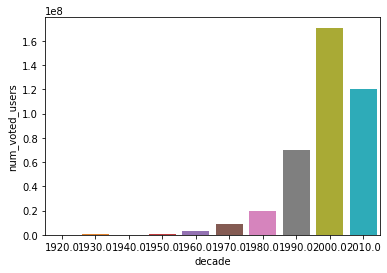

In [83]:
sns.barplot(x=df_by_decade['decade'],y=df_by_decade['num_voted_users'])

In [84]:
m1.to_csv('practiceques.csv')